Autores: Bruno Leal Fonseca & Guilherme Namen Pimenta

# CHAT GPT 4.o Canvas

## Business Understanding

Estou realizando um trabalho de aprendizado de máquinas que consiste usar um algoritmo de classificação na seguinte base de dados:
https://www.kaggle.com/datasets/jacopoferretti/expedia-travel-dataset/data

A variável alvo da classificação é a: is_mobile

Primeiro devemos responder algumas questões de business understanding:

Objetivo do Dataset: Descreva o propósito do dataset e como ele pode ser usado para resolver problemas de negócio.
Origem dos Dados: Explique a fonte do dataset (seu autor, instituição de origem ou como ele foi coletado).
Características do Dataset: Descreva as colunas e as informações contidas em cada uma delas. Explique o que as linhas e colunas representam.
Relação com o Problema de Negócio: Justifique a escolha do dataset e sua relevância para a aplicação que se pretende explorar

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Objetivo do Dataset**
O dataset contém informações sobre buscas de viagens na plataforma Expedia. O propósito é analisar e prever padrões de comportamento do usuário, como identificar se um acesso foi feito por um dispositivo móvel `is_mobile`. Ele pode ser usado para personalizar estratégias de marketing, melhorar a experiência do usuário ou otimizar a alocação de recursos baseando-se em como os clientes acessam os serviços.

**Origem dos Dados**
Os dados foram coletados da plataforma Expedia e disponibilizados por Jacopo Ferretti no Kaggle. Eles são extraídos diretamente da interação dos usuários com o site, representando eventos reais relacionados a reservas e buscas.

**Características do Dataset**
- Linhas: Representam eventos individuais de busca ou reserva por usuários.
- Colunas: Contêm informações específicas sobre o evento, como:
    - `date_time`: Data e hora do evento.
    - `site_name`: Identificador do site onde o evento ocorreu.
    - `posa_continent`: Continente de origem do ponto de venda.
    - `user_location_country`, user_location_region, user_location_city: Localização do usuário.
    - `orig_destination_distance`: Distância entre o usuário e o destino.
    - `user_id`: Identificador único do usuário.
    - `is_mobile`: Indica se o acesso foi por dispositivo móvel (variável alvo).
    - `is_package`: Se o evento envolveu um pacote de viagem.
    - `srch_ci`, srch_co: Datas de check-in e check-out.
    - `srch_adults_cnt`, srch_children_cnt, srch_rm_cnt: Número de adultos, crianças e quartos na busca.
    - `srch_destination_id`, srch_destination_type_id: Identificadores do destino e seu tipo.
    - `is_booking`: Indica se o evento foi uma reserva.
    - `cnt`: Contagem do número de eventos.
    - `Informações` sobre o hotel:
    - `hotel_continent`, `hotel_country`, `hotel_market`, `hotel_cluster`

**Relação com o Problema de Negócio:**
Este dataset é relevante para o objetivo de classificar se o acesso foi realizado via dispositivo móvel, já que inclui informações ricas sobre o contexto do evento e o comportamento do usuário. Esse tipo de análise pode ser usado para:

- Personalizar a interface com base no dispositivo.
- Ajustar estratégias de marketing para usuários móveis.
- Melhorar a experiência do usuário para acessos via dispositivos móveis.

In [ ]:
import pandas as pd

# Load the dataset to examine its structure
file_path = '/mnt/data/travel.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset to help answer the questions
data_info = data.info()
data_head = data.head()

data_info, data_head

## Data Understanding & Data Preparation

A próxima etapa é realizar o data preparation:

Nesta segunda fase, o foco será explorar o dataset em mais detalhes e realizar a preparação dos dados para os próximos passos.

**Data Understanding:**

- Exploração Inicial: Análise inicial dos dados (distribuição de valores, estatísticas descritivas, valores nulos, etc.).

- Análise Visual: Geração de gráficos e visualizações que ajudem a compreender melhor o dataset. Insights sobre os Dados: Identifique padrões, outliers e outras características relevantes no dataset.

**Data Preparation:**

- Limpeza de Dados: Tratamento de dados nulos, duplicados ou incoerentes.
- Transformação de Dados: Normalização, discretização ou outras transformações necessárias para o correto funcionamento dos algoritmos.
- Seleção de Features: Escolha das colunas mais relevantes para a modelagem, se necessário.
- Divisão dos Dados: Separação entre dados de treino e teste (se aplicável).

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

````DataVisualization
# Re-importando as bibliotecas e carregando o dataset novamente devido ao reset de estado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/mnt/data/travel.csv'
data = pd.read_csv(file_path)

# Verificar valores nulos, estatísticas descritivas e duplicados
null_values = data.isnull().sum()
duplicates = data.duplicated().sum()
stats_desc = data.describe()

# Visualizar a distribuição da variável alvo
plt.figure(figsize=(8, 5))
sns.countplot(x='is_mobile', data=data)
plt.title('Distribuição da variável alvo (is_mobile)')
plt.xlabel('is_mobile')
plt.ylabel('Contagem')
plt.show()

# Verificar correlações iniciais
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Exibir valores nulos, duplicados e estatísticas descritivas
null_values, duplicates, stats_desc
````

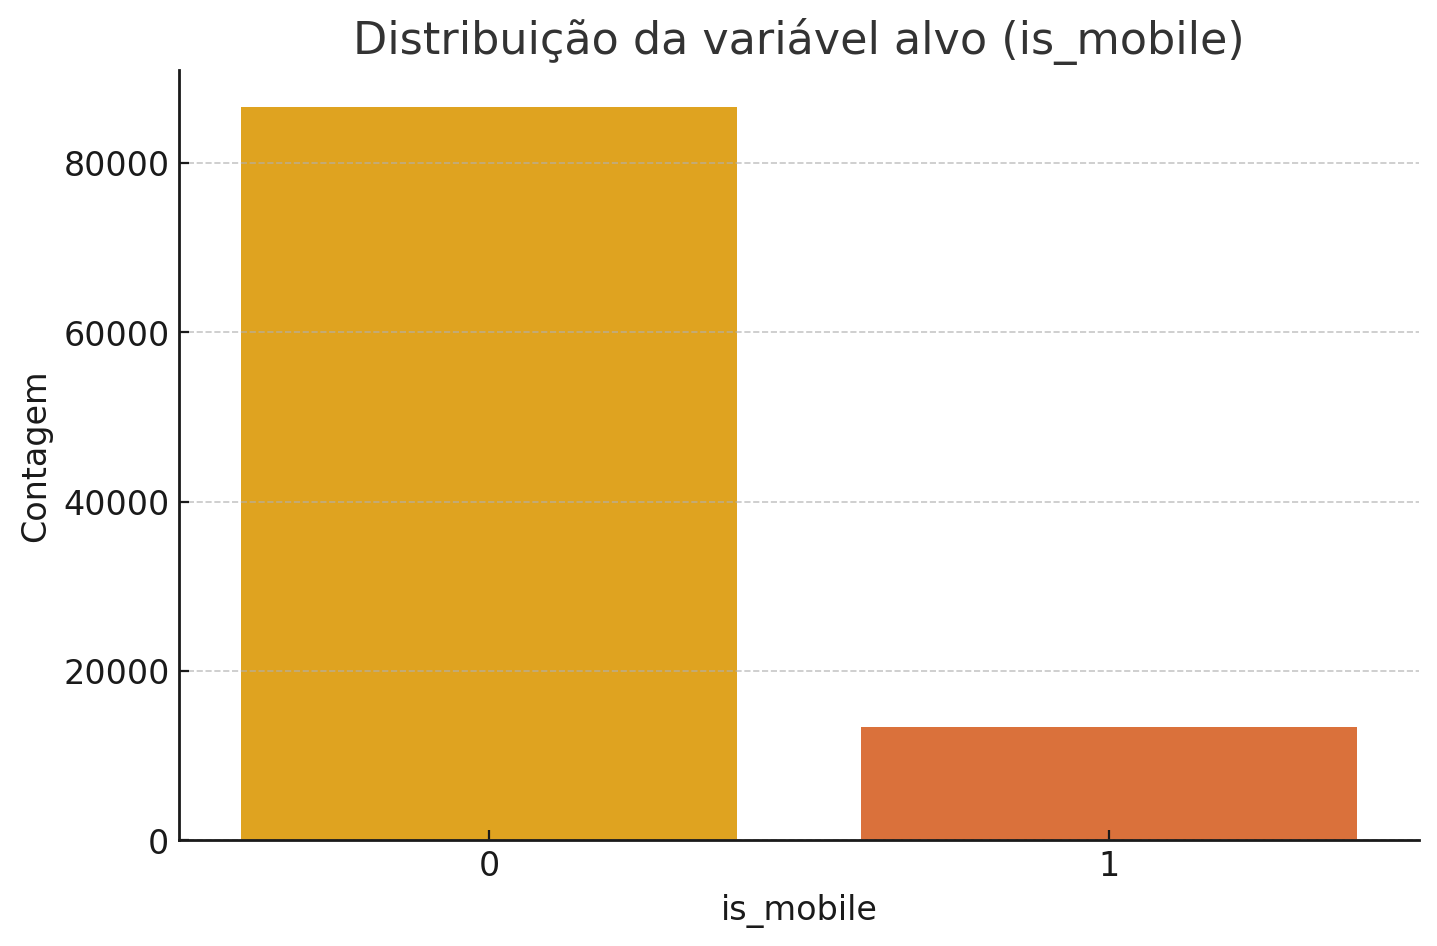

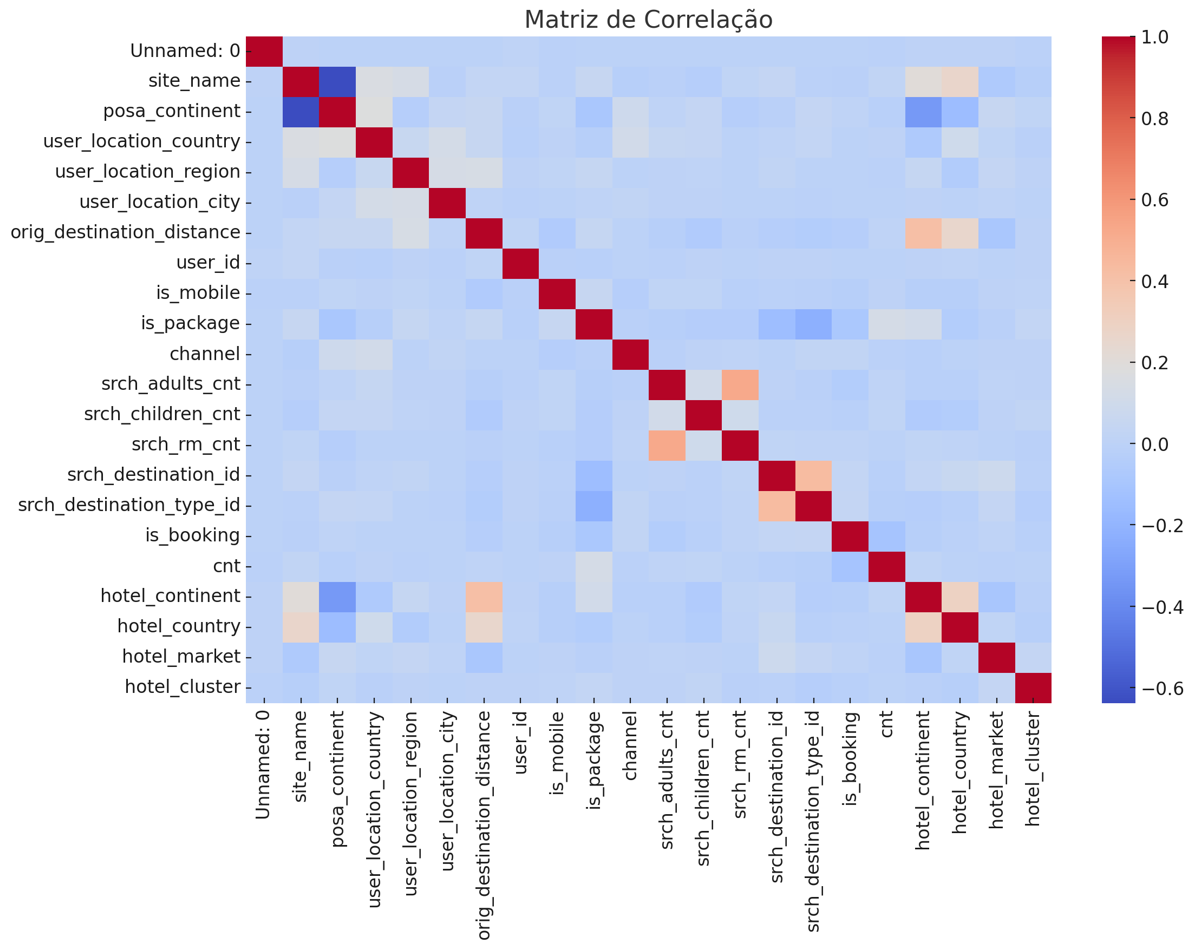


**Data Understanding - Resumo Inicial:**

1. Valores Nulos:
    - A coluna `orig_destination_distance` contém 36.085 valores nulos.
    - As colunas `srch_ci` e `srch_co` têm 122 valores nulos.
2. Duplicados:
    - Nenhuma linha duplicada foi encontrada.
3. Estatísticas Descritivas:
    - Muitas colunas são categóricas ou identificadores, enquanto algumas têm valores contínuos (`orig_destination_distance`, por exemplo).
    - A variável alvo `is_mobile` é desbalanceada, com a maioria dos registros sendo acessos não móveis.

**Insights:**

1. Distribuição da variável alvo:
    - A maior parte dos acessos não foi feita por dispositivos móveis, sugerindo que a base é desbalanceada.
2. Correlação:
    - Não há uma forte correlação linear direta aparente entre as variáveis numéricas e a variável alvo (is_mobile).

**Próximos Passos no Data Preparation:**

1. Tratamento de Dados Nulos:
    - Substituir valores ausentes por medianas/médias ou categorias "desconhecidas", dependendo da natureza da coluna.
2. Transformação de Dados:
    - Converter colunas de datas para variáveis numéricas, como dias da semana ou duração da viagem.
    - Escalar ou normalizar variáveis contínuas, se necessário.
3. Seleção de Features:
    - Identificar as colunas mais relevantes para prever is_mobile com base na correlação ou importância relativa.
4. Divisão do Conjunto de Dados:
    - Dividir em conjuntos de treino e teste (80%/20%).

Poderia aplicar os passos onde são eliminadas as linhas que apresentam valores nulos, além de fazer algumas checagens de lógica, tais como:
Conferir se srch_children_cnt + srch_adults_cnt > 0.0, para garantir que não foram feitas buscas onde não eram inseridos quaisquer pessoas.

Conferir se srch_adults_cnt > 0.0, pois não devem ser feitas reservas sem adultos.

Também converter as colunas date_time, srch_ci, srch_co para datetime e estimar:
travel_duration = (data.srch_co - data.srch_ci).dt.days
days_in_advance = (data.srch_ci - data.date).dt.days

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

O dataset foi limpo e ajustado com as seguintes etapas aplicadas:

1. Linhas com valores nulos foram removidas.
2. Busca sem pessoas verificadas:
    - Garantido que a soma de `srch_children_cnt` e `srch_adults_cnt` seja maior que 0.
3. Busca sem adultos excluídas:
    - Removidas linhas com `srch_adults_cnt` igual a 0.
4. Conversões de data:
    - Colunas `date_time`, `srch_ci` e `srch_co` foram convertidas para o formato datetime.
5. Novas colunas criadas:
    - `travel_duration`: Duração da viagem em dias.
    - `days_in_advance`: Dias de antecedência da busca em relação à data do check-in.
6. Inconsistências removidas:
    - Apenas registros com `travel_duration > 0` foram mantidos.

Agora o dataset limpo está disponível para análise. Se desejar, podemos avançar para a análise exploratória, engenharia de features ou divisão dos dados para modelagem!

In [ ]:
# Removendo linhas com valores nulos
data_cleaned = data.dropna()

# Conferindo se srch_children_cnt + srch_adults_cnt > 0
data_cleaned = data_cleaned[
    (data_cleaned['srch_children_cnt'] + data_cleaned['srch_adults_cnt']) > 0
]

# Conferindo se srch_adults_cnt > 0
data_cleaned = data_cleaned[data_cleaned['srch_adults_cnt'] > 0]

# Convertendo colunas para datetime
data_cleaned['date_time'] = pd.to_datetime(data_cleaned['date_time'], errors='coerce')
data_cleaned['srch_ci'] = pd.to_datetime(data_cleaned['srch_ci'], errors='coerce')
data_cleaned['srch_co'] = pd.to_datetime(data_cleaned['srch_co'], errors='coerce')

# Criando as colunas travel_duration e days_in_advance
data_cleaned['travel_duration'] = (data_cleaned['srch_co'] - data_cleaned['srch_ci']).dt.days
data_cleaned['days_in_advance'] = (data_cleaned['srch_ci'] - data_cleaned['date_time']).dt.days

# Removendo valores inconsistentes de travel_duration (duração da viagem deve ser positiva)
data_cleaned = data_cleaned[data_cleaned['travel_duration'] > 0]

# Exibindo informações finais do dataset limpo
data_cleaned.info(), data_cleaned.head()

## Modelling

Vamos proceder para a parte de modelagem, onde iremos aplicar alguns algoritmos de classificação, comparar resultados, realizar o cross validation para avaliar o quão robusto o modelo se tornou ao classificar a base, aplicar métodos de staking para juntar os algoritmos e obter um método de classificação mais eficiente que junta o melhor de cada.
Como foi mencionado antes, a base apresenta ser bem desbalanceadas nas classes da variável alvo, também seria interessante abordar essa questão antes de tudo.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Antes de proceder à modelagem, precisamos abordar o desbalanceamento da variável alvo, pois isso pode afetar a performance dos modelos de classificação. Aqui está o plano:

1. Abordagem para o Desbalanceamento:
    - Oversampling (SMOTE): Gerar mais exemplos da classe minoritária.
    - Undersampling: Reduzir a quantidade de exemplos da classe majoritária.
    - Estratégias híbridas: Combinação de oversampling e undersampling.
    - Classificadores com pesos: Usar modelos que ajustam automaticamente os pesos das classes.
2. Divisão dos Dados:
    - Dividir o dataset em conjunto de treino e teste antes de aplicar técnicas de balanceamento (para evitar vazamento de informação).
    - Usar uma divisão padrão de 80%/20%.
3. Aplicação dos Modelos:
    - Logistic Regression
    - Random Forest
    - Gradient Boosting (XGBoost, LightGBM)
    - Support Vector Machines (SVM)
    - Avaliar o desempenho com métricas apropriadas (ex.: AUC-ROC, F1-Score).
4. Cross Validation:
    - Usar k-fold cross-validation para validar a robustez de cada modelo.
5. Stacking Ensemble:
    - Combinar os modelos com um meta-modelo para melhorar a performance geral.
    - Vou começar ajustando o desbalanceamento da variável alvo e dividir os dados em treino e teste.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Separando os recursos (features) e a variável alvo (target)
X = data_cleaned.drop(columns=['is_mobile'])
y = data_cleaned['is_mobile']

# Dividindo os dados em treino e teste (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Concatenando novamente os dados de treino para aplicar técnicas de balanceamento
train_data = pd.concat([X_train, y_train], axis=1)

# Separando classes majoritárias e minoritárias
majority_class = train_data[train_data['is_mobile'] == 0]
minority_class = train_data[train_data['is_mobile'] == 1]

# Aplicando oversampling (SMOTE pode ser usado como alternativa mais avançada)
minority_upsampled = resample(minority_class, 
                              replace=True, 
                              n_samples=len(majority_class), 
                              random_state=42)

# Concatenando as classes balanceadas
balanced_train_data = pd.concat([majority_class, minority_upsampled])

# Separando novamente em X e y
X_train_balanced = balanced_train_data.drop(columns=['is_mobile'])
y_train_balanced = balanced_train_data['is_mobile']

# Verificando as proporções no conjunto balanceado
y_train_balanced.value_counts()

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Configurando os modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Função para treinar e avaliar os modelos
results = {}
for model_name, model in models.items():
    # Treinando o modelo
    model.fit(X_train_balanced, y_train_balanced)
    
    # Fazendo previsões
    y_pred = model.predict(X_test)
    
    # Calculando métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Cross-validation
    cross_val = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='f1').mean()
    
    # Armazenando os resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "AUC-ROC": auc_roc,
        "Cross-Val F1-Score": cross_val
    }
